In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dataset/EDOS 1M.csv')

In [5]:
df.head(20)

,dialogue_id,turn,uttr,eb+_emot,label_confidence
0,97,1,You moron ! What fool washes diapers by the we...,angry,0.437522
1,97,2,You useless fool !,furious,0.731564
2,99,1,How dare you sleep !,furious,0.605636
3,99,2,Up ! Go and clean the house .,prepared,0.650449
4,100,1,Clean the kitchen .,prepared,0.742187
5,100,2,"I cleaned the kitchen , ma 'am .",acknowledging,0.505242
6,124,1,Your name means to trust . It also means truth...,trusting,0.542891
7,124,2,You were given a great name . You 'd better li...,confident,0.524528
8,210,1,I 'll go home in the spring once the snow melts .,hopeful,0.548149
9,210,2,Listen . No matter how tough it gets I wouldn ...,trusting,0.552847


# EXAMPLE

In [6]:
print(df.loc[0, 'uttr'])
print('ASSOCIATED EMOTION:', df.loc[0, 'eb+_emot'])
print('CONFIDENCE:', df.loc[0, 'label_confidence'])

You moron ! What fool washes diapers by the well !
ASSOCIATED EMOTION: angry
CONFIDENCE: 0.43752193


# Nan Values

In [7]:
df.isna().sum()

dialogue_id         0
turn                0
uttr                0
eb+_emot            0
label_confidence    0
dtype: int64

# SIMPLE STATS

In [8]:
n_features = df.shape[1]
n_observations = df.shape[0]
print('DATASET includes {} observations and {} features'.format(n_features, n_observations))

DATASET includes 5 observations and 2829426 features


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829426 entries, 0 to 2829425
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   dialogue_id       int64  
 1   turn              int64  
 2   uttr              object 
 3   eb+_emot          object 
 4   label_confidence  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 107.9+ MB


In [10]:
df.describe()

,dialogue_id,turn,label_confidence
count,2.829426e+06,2.829426e+06,2.829426e+06
mean,4.412749e+06,2.175293e+00,7.299294e-01
std,2.546941e+06,1.278257e+00,1.826976e-01
min,1.000000e+00,1.000000e+00,4.240134e-01
25%,2.209518e+06,1.000000e+00,5.608567e-01
50%,4.413634e+06,2.000000e+00,7.352417e-01
75%,6.616340e+06,3.000000e+00,9.074353e-01
max,8.820637e+06,1.400000e+01,9.995806e-01


In [11]:
(df.loc[:, 'uttr'].apply(len) <= 0).sum()

0

In [12]:
# how many emotions?
emotions = df.loc[:, 'eb+_emot']

In [13]:
unique_emotions = emotions.unique()
n_emotions = len(unique_emotions)
print('DATASET includes {} emotions'.format(n_emotions))
print(unique_emotions)

DATASET includes 41 emotions
['angry' 'furious' 'prepared' 'acknowledging' 'trusting' 'confident'
 'hopeful' 'caring' 'sentimental' 'anticipating' 'wishing' 'surprised'
 'ashamed' 'questioning' 'sad' 'nostalgic' 'devastated' 'terrified'
 'embarrassed' 'lonely' 'encouraging' 'suggesting' 'content' 'afraid'
 'impressed' 'agreeing' 'apprehensive' 'proud' 'annoyed' 'anxious'
 'grateful' 'excited' 'neutral' 'faithful' 'guilty' 'consoling'
 'disgusted' 'disappointed' 'jealous' 'joyful' 'sympathizing']


In [14]:
emotions_, count_ = np.unique(emotions, return_counts=True)

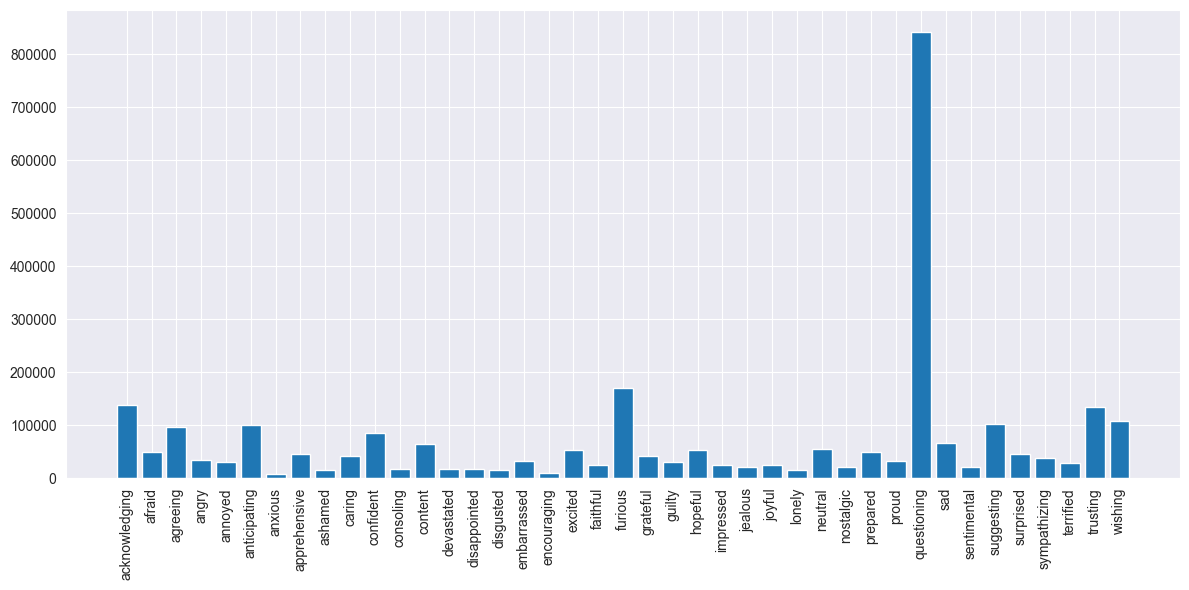

In [15]:
fig = plt.figure(1, figsize=(12, 6))
plt.bar(emotions_, count_)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
print(f'Smallest emotion: {emotions_[np.argmin(count_)]} with {np.min(count_)} occurrences')
print(f'Bigger emotion: {emotions_[np.argmax(count_)]} with {np.max(count_)} occurrences')
balance_df = []
smallest = np.min(count_)
generator = np.random.default_rng(0)
for emo in emotions_:
    print('deleting for {}'.format(emo))
    group = df[df.loc[:, 'eb+_emot'] == emo].copy(deep=True).reset_index(drop=True)
    group_size = len(group)
    if group_size == smallest:
        balance_df.append(group)
        continue
    select_random = generator.choice(range(group_size), size=group_size - smallest, replace=False)
    group.drop(select_random, axis=0, inplace=True)
    print(group.shape)
    balance_df.append(group.copy())
print('DATASET is balanced')

Smallest emotion: anxious with 8578 occurrences
Bigger emotion: questioning with 841556 occurrences
deleting for acknowledging
(8578, 5)
deleting for afraid
(8578, 5)
deleting for agreeing
(8578, 5)
deleting for angry
(8578, 5)
deleting for annoyed
(8578, 5)
deleting for anticipating
(8578, 5)
deleting for anxious
deleting for apprehensive
(8578, 5)
deleting for ashamed
(8578, 5)
deleting for caring
(8578, 5)
deleting for confident
(8578, 5)
deleting for consoling
(8578, 5)
deleting for content
(8578, 5)
deleting for devastated
(8578, 5)
deleting for disappointed
(8578, 5)
deleting for disgusted
(8578, 5)
deleting for embarrassed
(8578, 5)
deleting for encouraging
(8578, 5)
deleting for excited
(8578, 5)
deleting for faithful
(8578, 5)
deleting for furious
(8578, 5)
deleting for grateful
(8578, 5)
deleting for guilty
(8578, 5)
deleting for hopeful
(8578, 5)
deleting for impressed
(8578, 5)
deleting for jealous
(8578, 5)
deleting for joyful
(8578, 5)
deleting for lonely
(8578, 5)
deleti

In [17]:
balance_df = pd.concat(balance_df)
balance_df.shape

(351698, 5)

In [18]:
balance_df.head(1000)

,dialogue_id,turn,uttr,eb+_emot,label_confidence
15,4728,4,"Yeah , more like the schedule .",acknowledging,0.590446
23,9317,1,"Bye . He just really , really liked you .",acknowledging,0.518137
26,11641,1,"All right , yep , and in ... And there we go ....",acknowledging,0.551536
51,26789,2,"Right , the newspaper Over there",acknowledging,0.768948
121,55176,1,Sadako ...,acknowledging,0.460058
...,...,...,...,...,...
15849,3937729,2,Marian .,acknowledging,0.493262
15862,3993129,2,Look at him . He 's so cute .,acknowledging,0.890188
15883,4133804,5,That 's an expensive item . You could say that .,acknowledging,0.888570
15888,4171687,2,Paul . Tone .,acknowledging,0.688395


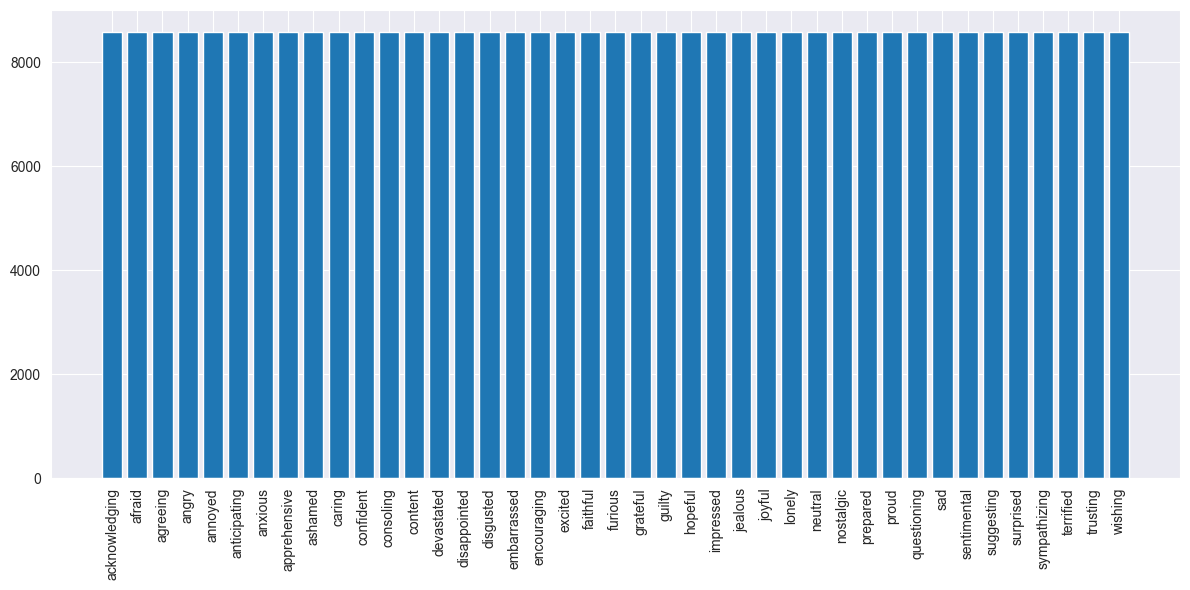

In [19]:
emotions = balance_df.loc[:, 'eb+_emot']
unique_emotions = emotions.unique()
emotions_, count_ = np.unique(emotions, return_counts=True)
fig = plt.figure(1, figsize=(12, 6))
plt.bar(emotions_, count_)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
df = balance_df.copy(deep=True).reset_index()
df.to_pickle('./dataset/EDOS_1M_balanced.pkl')

In [21]:
balance_df.describe()

,dialogue_id,turn,label_confidence
count,3.516980e+05,351698.000000,351698.000000
mean,4.418877e+06,2.230655,0.671417
std,2.539499e+06,1.288797,0.170848
min,8.400000e+01,1.000000,0.424014
25%,2.233477e+06,1.000000,0.519170
50%,4.418258e+06,2.000000,0.645043
75%,6.621162e+06,3.000000,0.814435
max,8.820631e+06,13.000000,0.999571


In [22]:
(df.isna().sum() > 0).any()

False

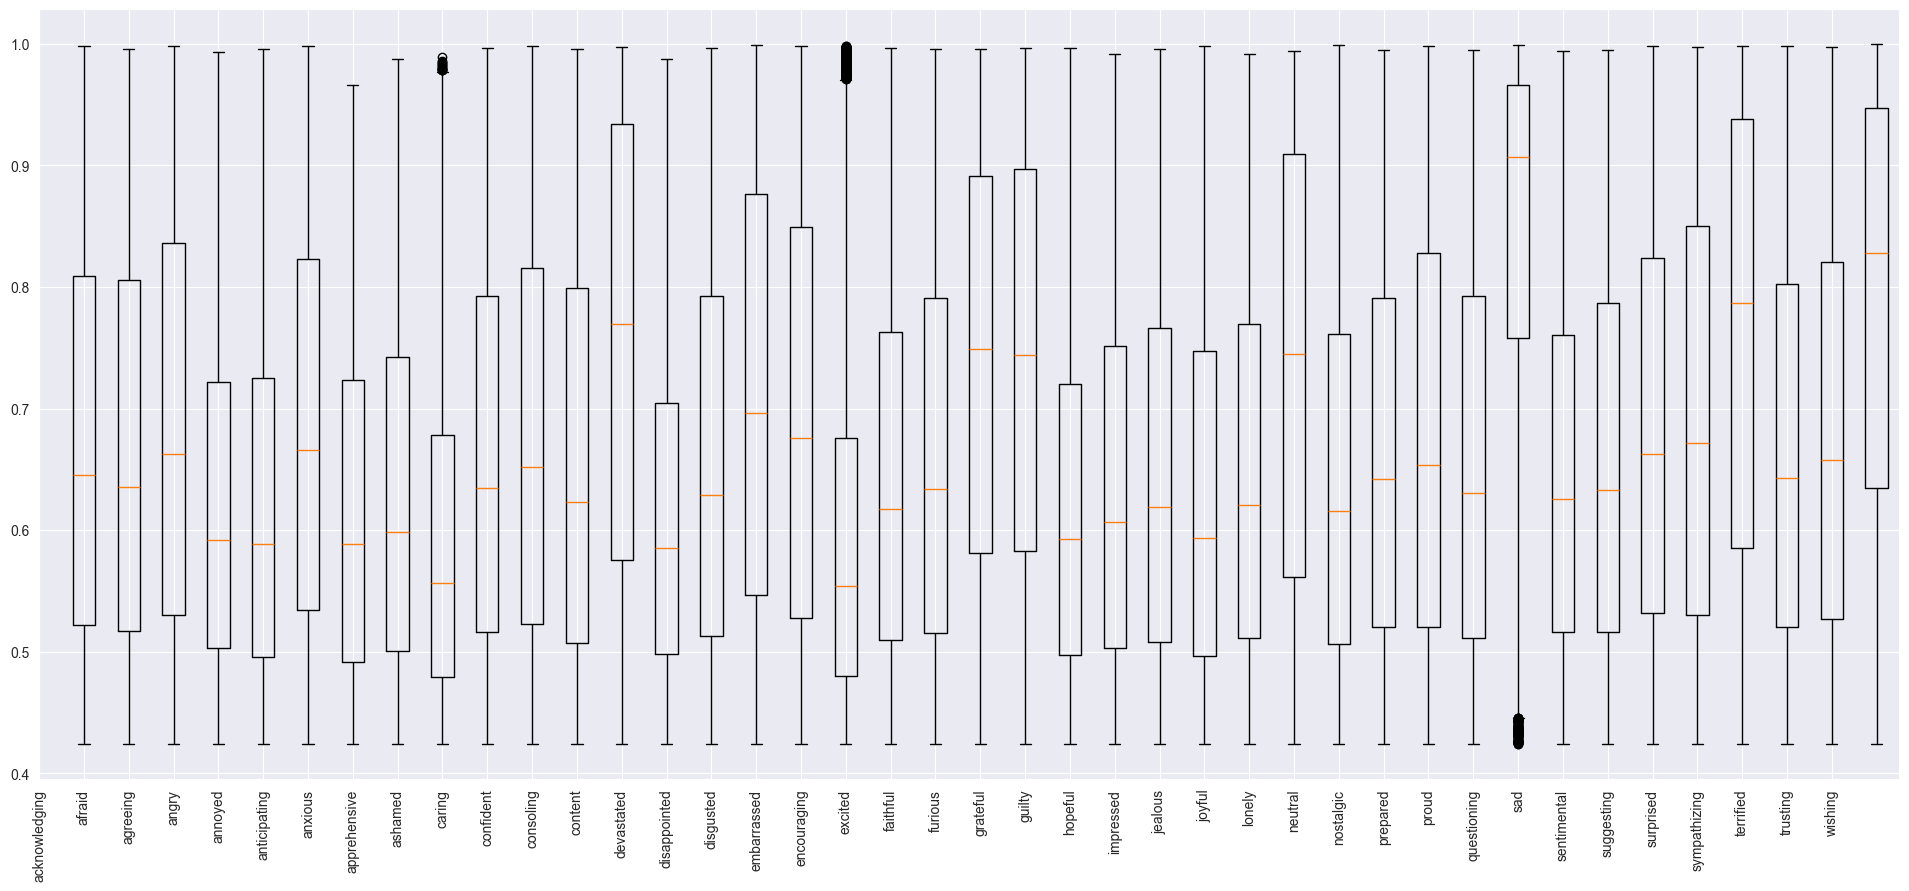

In [23]:
def parse_emotions():
    for emo in unique_emotions:
        e = df[df.loc[:, 'eb+_emot'] == emo].loc[:, 'label_confidence'].to_numpy(dtype=np.float32)
        yield emo, e


fig = plt.figure(figsize=(24, 10))
e_values = [e[-1] for e in parse_emotions()]
plt.boxplot(e_values)
plt.xticks(range(n_emotions), unique_emotions)
plt.xticks(rotation=90)
plt.show()


In [24]:
list_stats = []
for emo, e in parse_emotions():
    list_stats.append(pd.DataFrame([[np.mean(e), np.std(e)]], columns=['mean', 'std'], index=[emo]))

df_mean_std = pd.concat(list_stats)

In [25]:
df_mean_std = df_mean_std.sort_values(by='mean')

In [26]:
df_mean_std.head(41)

,mean,std
ashamed,0.593506,0.138774
encouraging,0.595735,0.145156
devastated,0.611258,0.135588
anxious,0.616565,0.141875
guilty,0.619355,0.141506
annoyed,0.620793,0.147127
angry,0.622949,0.143233
apprehensive,0.628809,0.148057
jealous,0.634864,0.164331
hopeful,0.635818,0.153395


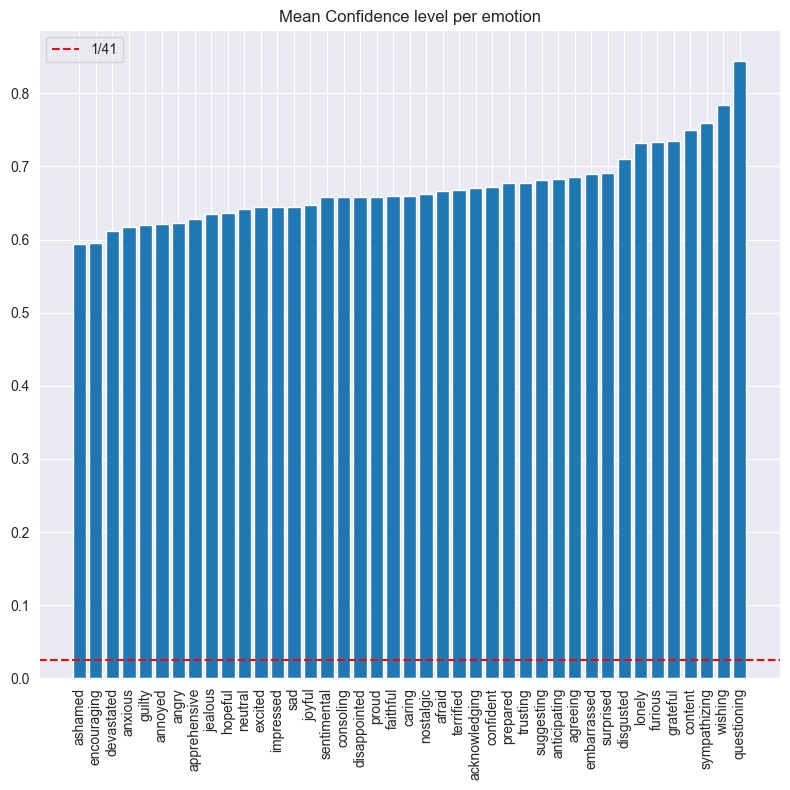

In [27]:
fig = plt.figure(figsize=(8, 8))
plt.bar(df_mean_std.index.values, df_mean_std.loc[:, 'mean'].values)
plt.title('Mean Confidence level per emotion')
plt.axhline(y=1 / n_emotions, color='red', linestyle='--', label=f'1/{n_emotions}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

In [28]:
# check average length of utterances
mean_length_u = df.loc[:, 'uttr'].apply(len).mean()
print('DATASET: mean length of utterances', mean_length_u)

DATASET: mean length of utterances 72.81125567958874


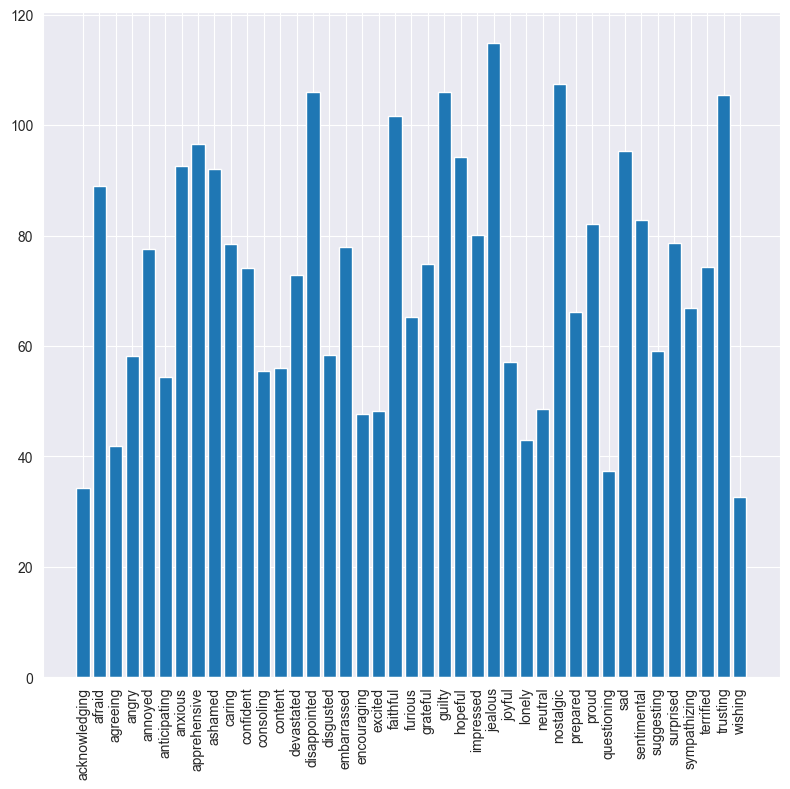

In [29]:
# check average length of utterances per emotions
def parse_utterances():
    for emo in unique_emotions:
        yield df[df.loc[:, 'eb+_emot'] == emo].loc[:, 'uttr'].apply(len).mean()


u_values = [u for u in parse_utterances()]
fig = plt.figure(figsize=(8, 8))
plt.bar(unique_emotions, u_values)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [78]:
df_sns = balance_df.copy()
dict_emotion_to_category = {key: value for key, value in zip(unique_emotions, range(len(unique_emotions)))}
print(dict_emotion_to_category)
# df_sns = 

{'acknowledging': 0, 'afraid': 1, 'agreeing': 2, 'angry': 3, 'annoyed': 4, 'anticipating': 5, 'anxious': 6, 'apprehensive': 7, 'ashamed': 8, 'caring': 9, 'confident': 10, 'consoling': 11, 'content': 12, 'devastated': 13, 'disappointed': 14, 'disgusted': 15, 'embarrassed': 16, 'encouraging': 17, 'excited': 18, 'faithful': 19, 'furious': 20, 'grateful': 21, 'guilty': 22, 'hopeful': 23, 'impressed': 24, 'jealous': 25, 'joyful': 26, 'lonely': 27, 'neutral': 28, 'nostalgic': 29, 'prepared': 30, 'proud': 31, 'questioning': 32, 'sad': 33, 'sentimental': 34, 'suggesting': 35, 'surprised': 36, 'sympathizing': 37, 'terrified': 38, 'trusting': 39, 'wishing': 40}


In [79]:
df_sns['eb+_emot'] = df_sns['eb+_emot'].apply(lambda x: dict_emotion_to_category[x])

In [80]:
df_sns['uttr'] = df_sns['uttr'].apply(len)

In [81]:
df_sns

,dialogue_id,turn,uttr,eb+_emot,label_confidence
15,4728,4,31,0,0.590446
23,9317,1,41,0,0.518137
26,11641,1,92,0,0.551536
51,26789,2,32,0,0.768948
121,55176,1,10,0,0.460058
...,...,...,...,...,...
108626,8785404,2,13,40,0.976645
108631,8792558,2,32,40,0.794644
108632,8792604,1,7,40,0.941762
108636,8795697,2,260,40,0.432060


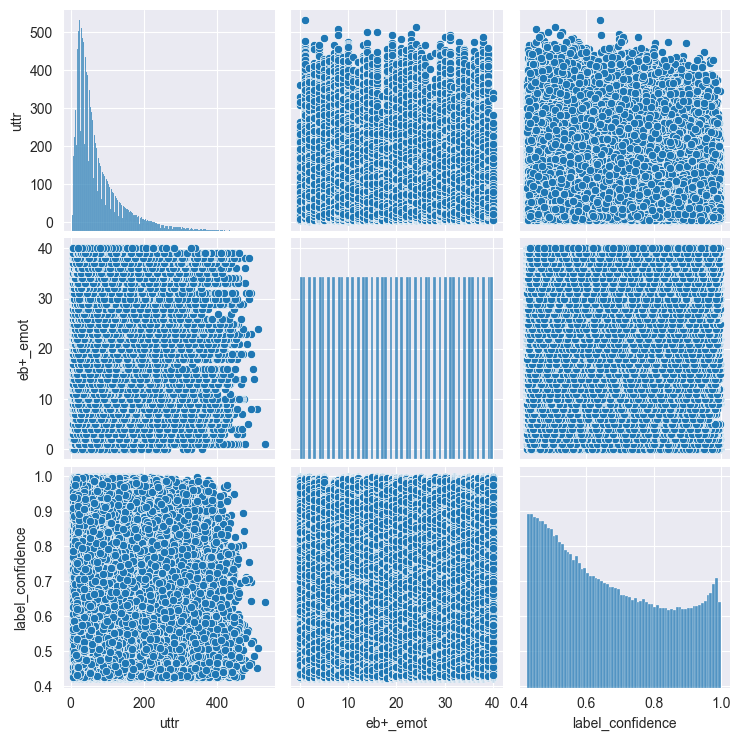

In [85]:
import seaborn as sns

sns.pairplot(df_sns.loc[:, ['uttr', 'eb+_emot', 'label_confidence']])
plt.show()

/var/folders/h5/88yx6pz562xgpwzx7ghxvbjr0000gn/T/ipykernel_22225/1398713705.py:7: RuntimeWarning: invalid value encountered in divide
  scaled_count_ = (np.array(count_) - np.min(count_)) / (


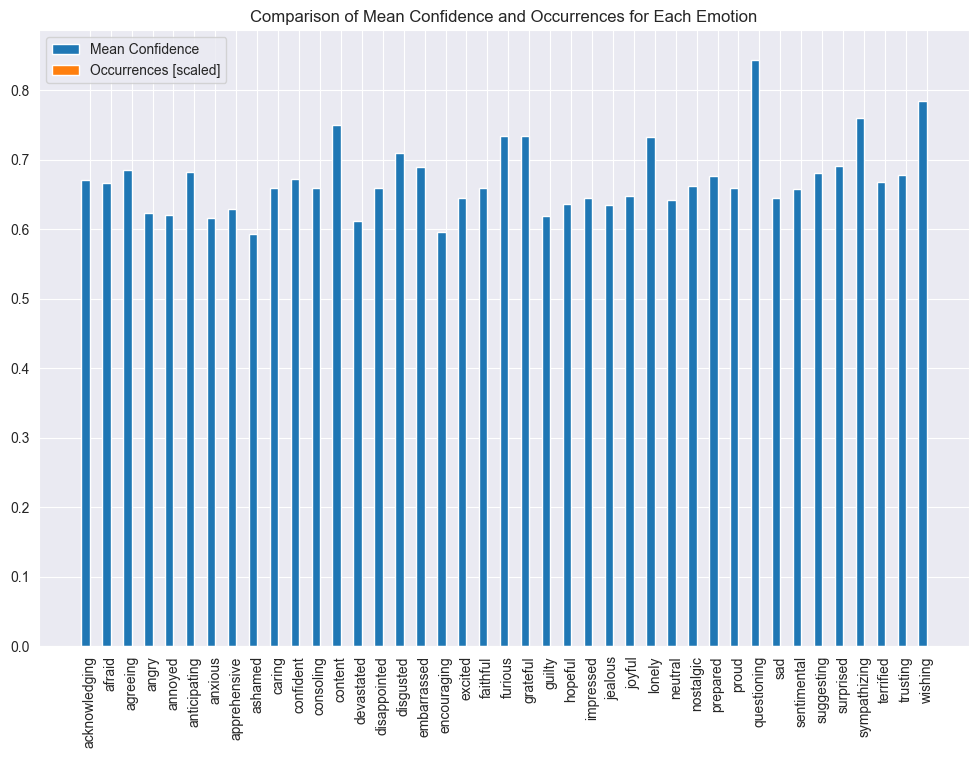

In [86]:
fig = plt.figure(figsize=(12, 8))
t = np.array([i for i in range(n_emotions)])
# Plotting mean label confidence
mm = df_mean_std.loc[unique_emotions, 'mean']
plt.bar(t - 0.2, df_mean_std.loc[unique_emotions, 'mean'], width=0.4, label='Mean Confidence')

scaled_count_ = (np.array(count_) - np.min(count_)) / (
        np.max(count_) - np.min(count_))

# Plotting occurrences
plt.bar(t + 0.2, scaled_count_, width=0.4, label='Occurrences [scaled]')

# Adding labels and title
plt.title('Comparison of Mean Confidence and Occurrences for Each Emotion')
plt.xticks(range(n_emotions), unique_emotions, rotation=90)  # Set the emotion labels on the x-axis

# Adding legend
plt.legend()

# Display the plot
plt.show()


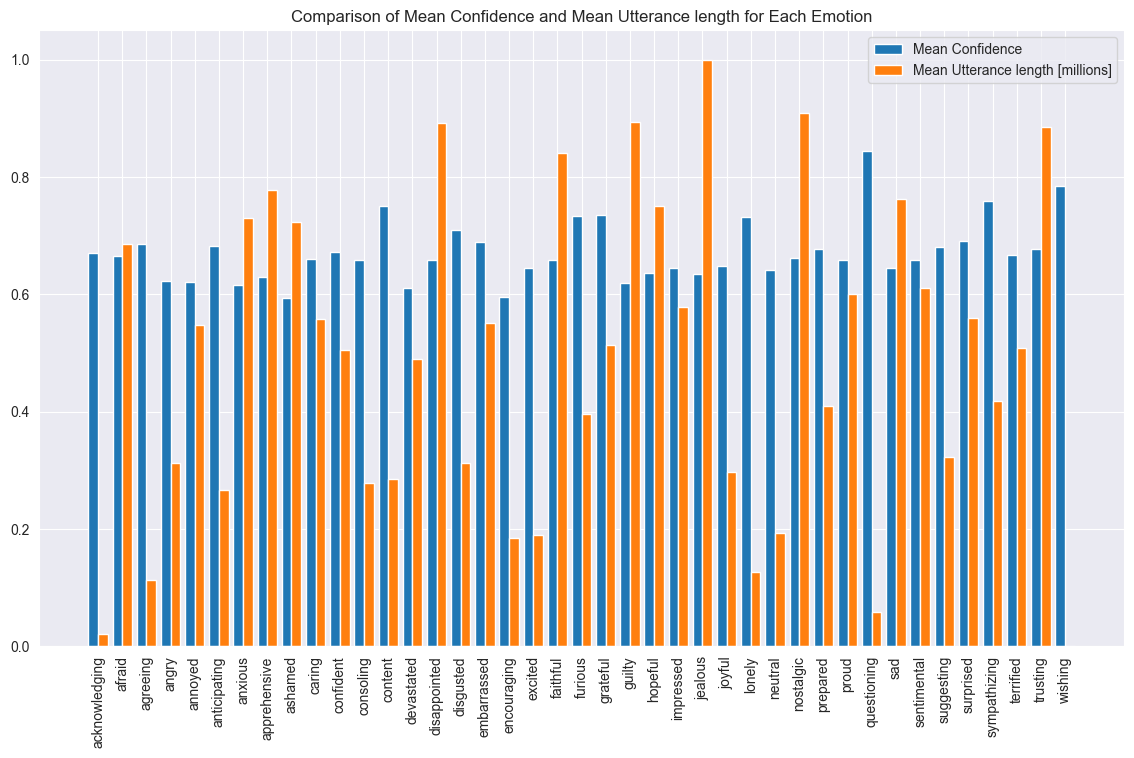

In [87]:
fig = plt.figure(figsize=(14, 8))
t = np.array([i for i in range(n_emotions)])
# Plotting mean label confidence
mm = df_mean_std.loc[unique_emotions, 'mean']
plt.bar(t - 0.2, mm, width=0.4, label='Mean Confidence')

scaled_u_values = (np.array(u_values) - np.min(u_values)) / (
        np.max(u_values) - np.min(u_values))

plt.bar(t + 0.2, scaled_u_values, width=0.4, label='Mean Utterance length [millions]')

plt.title('Comparison of Mean Confidence and Mean Utterance length for Each Emotion')
plt.xticks(range(n_emotions), unique_emotions, rotation=90)  # Set the emotion labels on the x-axis

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [32]:
# fig = plt.figure(figsize=(12, 8))
# X = np.random.choice([0,1], size=50)
# Y = np.random.randint(low=0, high=100, size=50)
# coeff = np.polyfit(X, Y, 1)
# poly = np.poly1d(coeff)
# plt.scatter(X, Y, color='red', label='Dati Osservati')
# plt.plot(X, poly(X), color='orange', label='Rigressione polinomiale')
# plt.xlabel('X (Variabile dicotomica)')
# plt.ylabel('Y (Variabile dipedente)')
# plt.legend()
# plt.show()

# CORRELATIONS

In [88]:
df_length_to_coeff = pd.concat((df.loc[:, 'uttr'].apply(len), df.loc[:, 'label_confidence']), axis=1)

In [89]:
df_length_to_coeff.head()

,uttr,label_confidence
0,31,0.590446
1,41,0.518137
2,92,0.551536
3,32,0.768948
4,10,0.460058


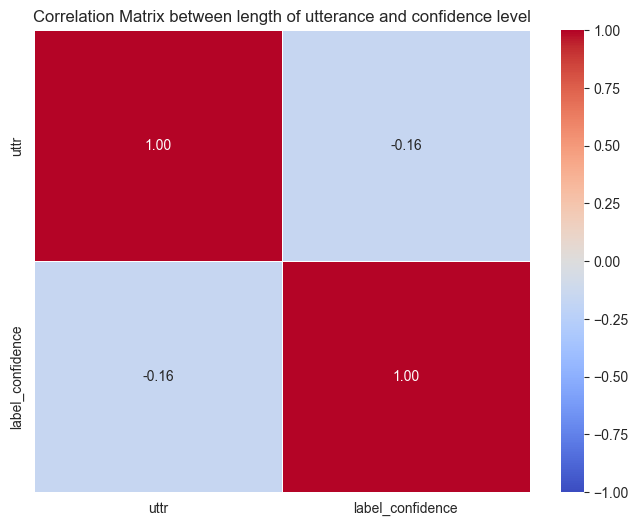

In [90]:
plt.figure(figsize=(8, 6))
corr_length_to_coeff = df_length_to_coeff.corr('spearman')
sns.heatmap(corr_length_to_coeff, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmax=1.0, vmin=-1.0)
plt.title('Correlation Matrix between length of utterance and confidence level')
plt.show()

# CLUSTER

In [1]:
import gensim.downloader as api
model_twitter = api.load("glove-twitter-50")
model_wiki = api.load("glove-wiki-gigaword-50")

[=====---------------------------------------------] 11.7% 23.4/199.5MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 48.7% 97.1/199.5MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.7% 174.9/199.5MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.5% 23.4/66.0MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [2]:
print(f"Vocabulary size twitter model:   {len(model_twitter)}")
print(f"Vocabulary size wikipedia model: {len(model_wiki)}")

Vocabulary size twitter model:   1193514
Vocabulary size wikipedia model: 400000


In [40]:
dataset = balance_df.loc[:, 'uttr'].to_numpy()
labels = balance_df.loc[:, 'eb+_emot'].to_numpy()

In [54]:
import re
pattern1 = re.compile('\n')
pattern2 = re.compile('[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}')
test = np.vectorize(lambda x: re.sub(pattern2, '',re.sub(pattern1, ' ', x)))(dataset)
tokens = [x.strip().lower().split(' ') for x in test]


In [74]:
def vectorize(tokens_, use_sum=True):
    global model_twitter
    vectors = np.zeros((len(tokens_),50))
    for i in range(0, len(tokens_)):
        embs = [model_twitter.get_vector(token) for token in tokens_[i] if token in model_twitter]
        if use_sum:
            vectors[i] = np.sum(embs, axis=0)
        else:
            vectors[i] = np.mean(embs, axis=0)
    return vectors
        

In [75]:
embeddings = vectorize(tokens)

In [94]:
embeddings.shape

(351698, 50)

In [96]:
import umap

In [117]:
reducer = umap.UMAP(n_components=3)

In [118]:
to_plot = reducer.fit_transform(embeddings)

/Users/marziolunghi/Documents/GitHub/ATML-NLP/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [119]:
to_plot

array([[ 9.608428  ,  2.5575573 ,  2.6070023 ],
       [ 6.4082513 , -0.08918401,  3.5296412 ],
       [ 2.7721033 ,  6.7650237 , -2.2652297 ],
       ...,
       [ 5.0568814 ,  2.3137803 , -3.7334113 ],
       [ 9.788213  ,  5.468396  , -7.562436  ],
       [ 9.648397  ,  4.08431   , -0.9190183 ]], dtype=float32)

In [121]:
# Assuming 'labels', 'to_plot', and 'dict_emotion_to_category' are defined
import plotly.express as px
limit = 10000
colors = sns.color_palette(n_colors=len(labels[:limit]))
colors = [colors[dict_emotion_to_category[x]] for x in labels[:limit]]

# Create a DataFrame
df = pd.DataFrame({'x': to_plot[:limit, 0], 'y': to_plot[:limit, 1], 'z': to_plot[:limit, 2], 'labels': labels[:limit]})

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(df, x='x', y='y', z='z', color='labels')

# Show the plot
fig.show()

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
translated_labels = [dict_emotion_to_category[x] for x in labels]
X_train, X_test, y_train, y_test = train_test_split(embeddings, translated_labels, stratify=translated_labels, random_state=12, shuffle=True)

In [132]:
from sklearn.cluster import BisectingKMeans
cluster = BisectingKMeans(n_clusters=len(dict_emotion_to_category))

cluster.fit(X_train)

BisectingKMeans(n_clusters=41)

In [133]:
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1_score_ = f1_score(y_true, y_pred, average='weighted')
    print(f'TEST SET: accuracy: {accuracy} ; f1 score: {f1_score_}')

In [134]:
y_pred = cluster.predict(X_test)

In [135]:
compute_metrics(y_test, y_pred)

TEST SET: accuracy: 0.023702018765993746 ; f1 score: 0.020507603084292145
